In [2]:
# Core imports
import numpy as np
import matplotlib.pyplot as plt
import cv2
import nibabel as nib

# SAM model imports
from segment_anything import sam_model_registry, SamPredictor



In [4]:
!pip install nibabel opencv-python matplotlib



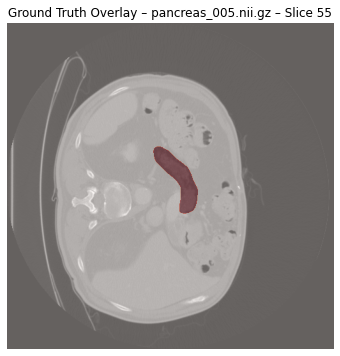

In [6]:
import nibabel as nib
import cv2
import numpy as np
import matplotlib.pyplot as plt

# MATCHED FILES
image_path = "/Users/olihiidikwu/Downloads/Task07_Pancreas/imagesTr/pancreas_005.nii.gz"
label_path = "/Users/olihiidikwu/Downloads/Task07_Pancreas/labelsTr/pancreas_005.nii.gz"

# Load image and label
img_data = nib.load(image_path).get_fdata()
label_data = nib.load(label_path).get_fdata()

# Choose a good slice (you can adjust between 50–90)
slice_index = 55
image_slice = img_data[:, :, slice_index]
gt_mask = label_data[:, :, slice_index]
gt_mask = (gt_mask > 0).astype(np.uint8)

# Normalize and convert to RGB
image_norm = ((image_slice - np.min(image_slice)) / (np.max(image_slice) - np.min(image_slice)) * 255).astype(np.uint8)
image_rgb = cv2.cvtColor(image_norm, cv2.COLOR_GRAY2RGB)

# Display
plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.imshow(gt_mask, alpha=0.4, cmap='Reds')
plt.title("Ground Truth Overlay – pancreas_005.nii.gz – Slice 55")
plt.axis('off')
plt.show()
